# Quantum embeding 

In [1]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

from aide_TP import display_deformation,Generate_random_points

### One quibit encoding 

The goal of this part is to encode of a data point (2 features) on the Bloch Sphere

In [2]:
import random
# choose random data point for the exemples using a seed for reproducibility
seed = int("uneseedpourleTP".encode('utf-8').hex(),16) % 2025
random.seed(seed)

x_data = random.uniform(0, 1)
y_data = random.uniform(0, 1)
print(f"The seed used is {seed}")
print(f"x_data = {x_data}, y_data = {y_data}")

The seed used is 72
x_data = 0.07342665480233157, y_data = 0.5943619291362376


The data embedded is 0.07342665480233157 


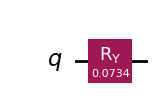

In [3]:
# One qubit angle embedding circuit

qc_angle_embeding = QuantumCircuit(1)


""" Add the correct gates in order to perform the angle embedding of x_data on the qubit """

qc_angle_embeding.ry(x_data, 0)

####
print(f"The data embedded is {x_data} ")
qc_angle_embeding.draw('mpl')



The data embedded is (x_data, y_data) = (0.07342665480233157, 0.5943619291362376) 


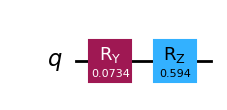

In [4]:
# One qubit dense embedding circuit

qc_dense_angle = QuantumCircuit(1)

#### Data must be able to cover all the bloch sphere
""" Add the correct gates in order to perform the dense embedding of (x_data, y_data) on the qubit """

qc_dense_angle.ry(x_data, 0)
qc_dense_angle.rz(y_data, 0)

####

print(f"The data embedded is (x_data, y_data) = ({x_data}, {y_data}) ")
qc_dense_angle.draw('mpl') 

In [5]:
X = [random.uniform(0, 1) for _ in range(8)]

""" 
Genereate a circuit that embed the data using angle embedding on multiple qubits
"""




' \nGenereate a circuit that embed the data using angle embedding on multiple qubits\n'

### DataSet encoding on one qubit and visulisation

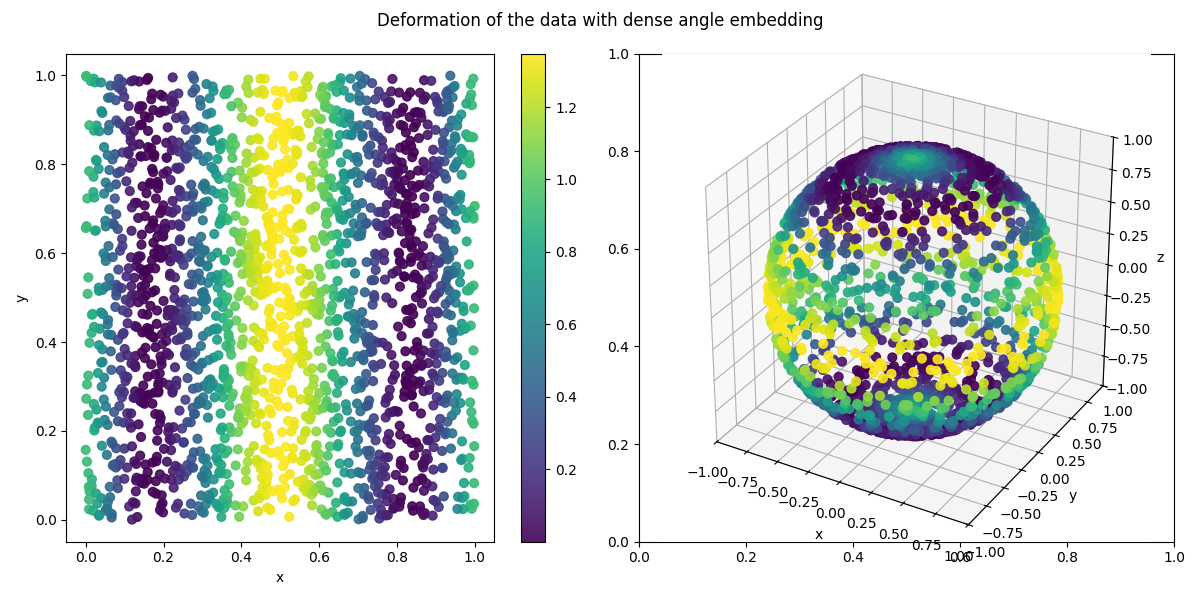

In [6]:
#just to have fun with the display
%matplotlib widget

def scale(pt):
    #### Choose a scaling factor in order to map the data to the entire Bloc Sphere
    
    """
    initalized at one, the student have to find the right factor values in order to cover the entire Bloch sphere
    """
    factor_x = np.pi
    factor_y = 2*np.pi

    ####
    
    x,y = pt[0], pt[1]
    return (x*factor_x, y*factor_y)


# Display the deformation of the data with the dense angle embedding
# this function genereate random points in 2D, apply the scaling function and display the result of the embedding in 3D
# The color of the points represent the deformlation of the area
fig, ax, ax3d, values = display_deformation([scale],
                                            n_points=2000,range_y=(0,1),range_x=(0,1),
                                            title="Deformation of the data with dense angle embedding",seed=seed, 
                                            point_generation="random")

  

plt.show(fig)


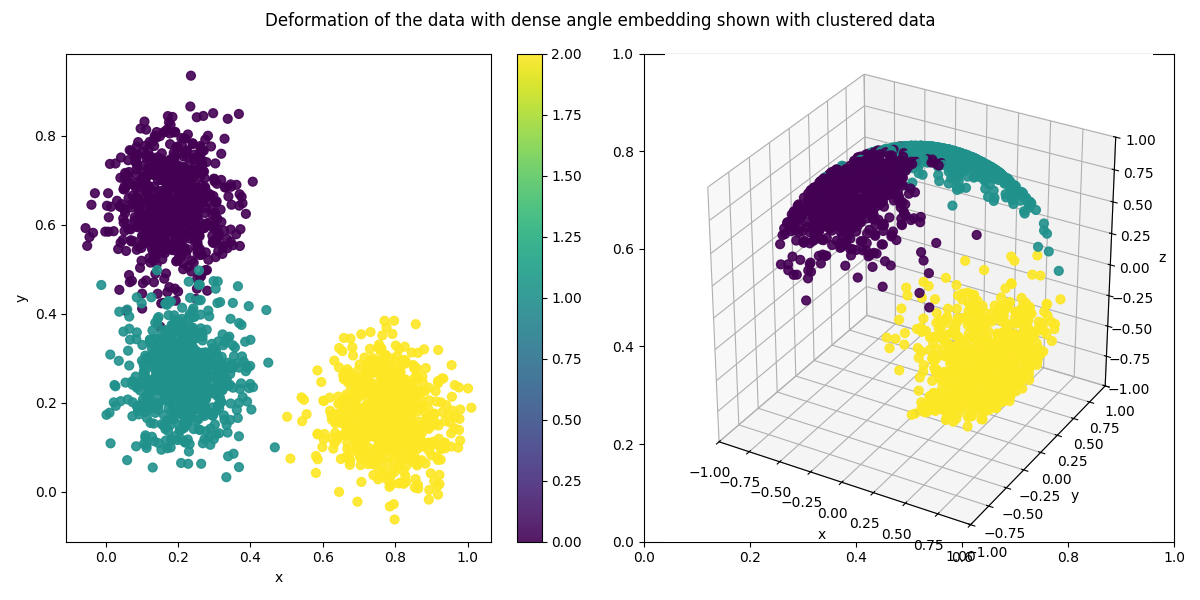

In [7]:

# another was to see the deformation of the data with the dense angle embedding
# this display thakes clustered data
fig, ax, ax3d, values = display_deformation([scale],
                                            n_points=1998,
                                            title="Deformation of the data with dense angle embedding shown with clustered data",
                                            seed=seed, 
                                            point_generation="clusters")
ax3d.scatter(0, 0, -1, s=20, alpha=0.9, color='C0')




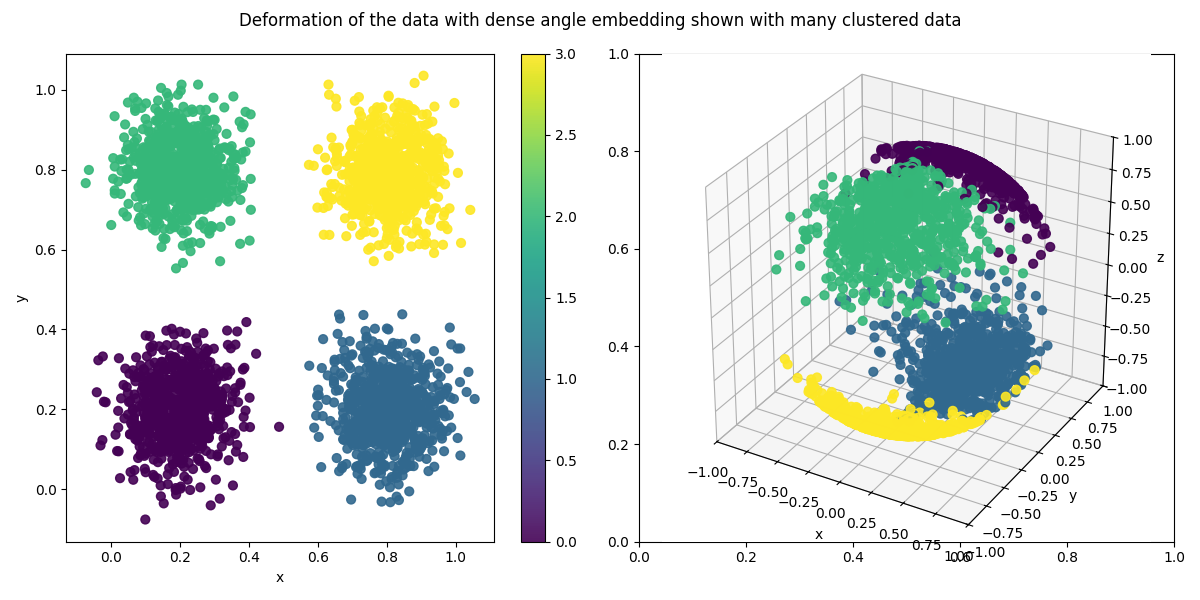

In [8]:
# worth case scenario with many clusters
init_centers = [(0.2,0.2), (0.8,0.2), (0.2,0.8), (0.8,0.8)]
fig, ax, ax3d, values = display_deformation([scale],
                                            range_y=(0,2),
                                            n_points=2200,
                                            title="Deformation of the data with dense angle embedding shown with many clustered data",
                                            seed=seed, 
                                            point_generation="clusters",
                                            init_centers=init_centers)


### Polar decomposition of data

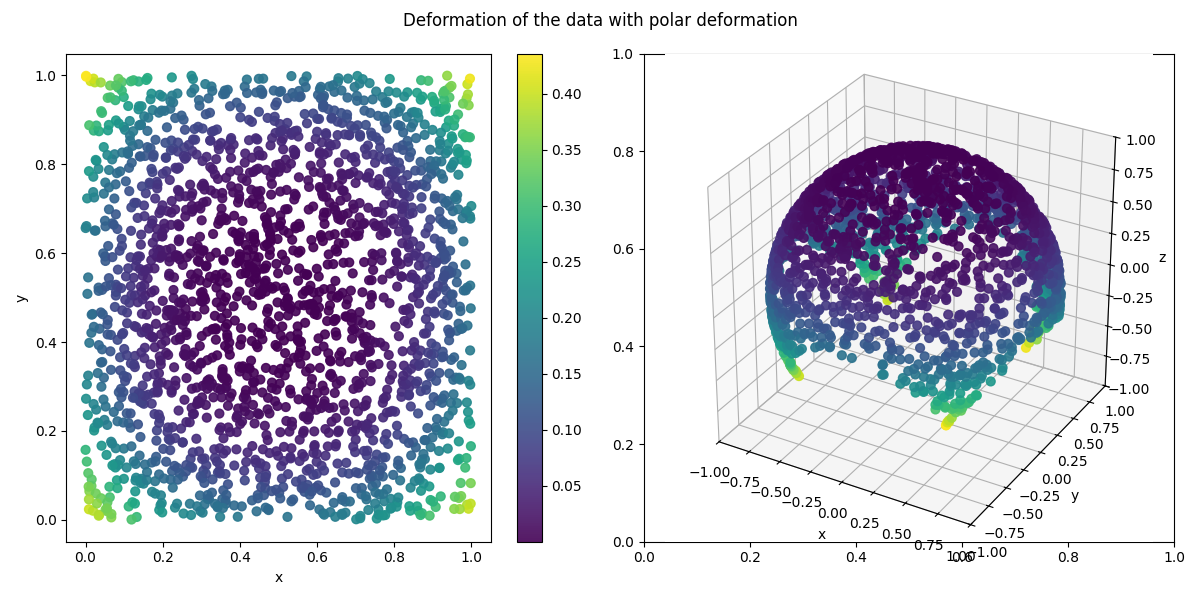

In [17]:
## think of a way using some kind of polar coordinates to better map the data

def center_data(pt):
    """A deformation function centering the data around (0,0)."""
    x,y = pt[0], pt[1]
    return (x-0.5, y-0.5)

def polar_deformation(pt):
    """A deformation function using polar coordinates."""
    r = np.linalg.norm(pt)
    theta = np.arccos(pt[1]/r)*np.sign(pt[0])
    # Scale r to [0, pi]
    r_scaled = r*np.pi
    return (r_scaled, theta)

deformation_polar_functions = [center_data, polar_deformation,]

# Display the deformation of the data with the polar deformation
fig, ax, ax3d, values = display_deformation(deformation_functions=deformation_polar_functions,
                                            range_y=(0,1),
                                            n_points=2000,
                                            title="Deformation of the data with polar deformation",
                                            seed=seed, 
                                            point_generation="random")



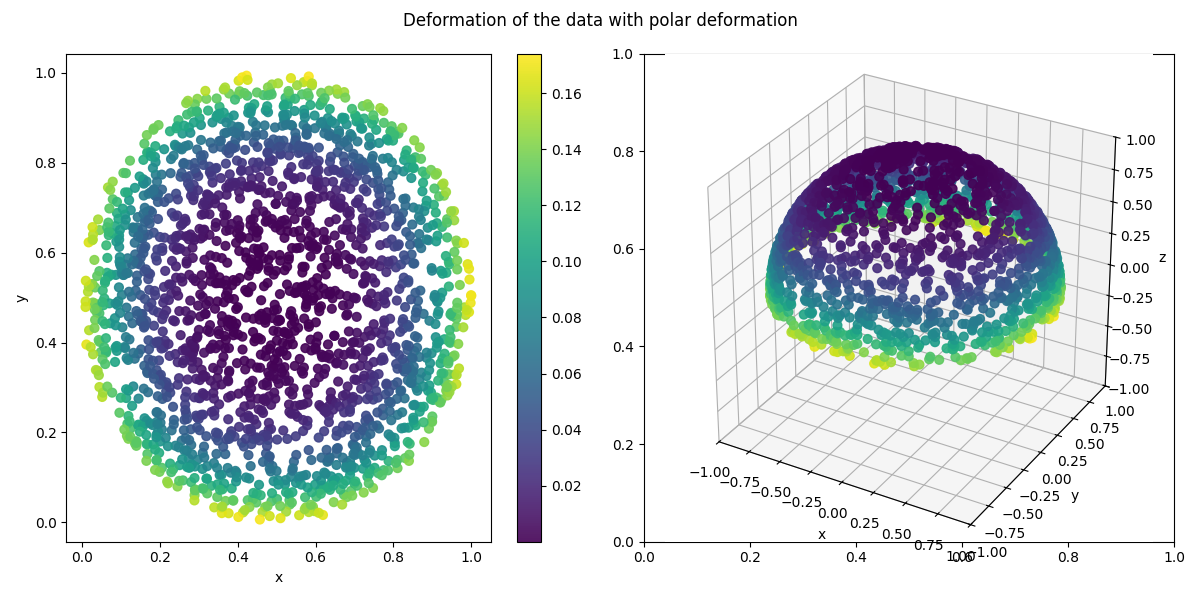

In [18]:
# Display the deformation of the data with the polar deformation
fig, ax, ax3d, values = display_deformation(deformation_functions=deformation_polar_functions,
                                            range_y=(0,1),
                                            n_points=2000,
                                            title="Deformation of the data with polar deformation",
                                            seed=seed, 
                                            point_generation="random_circle",)

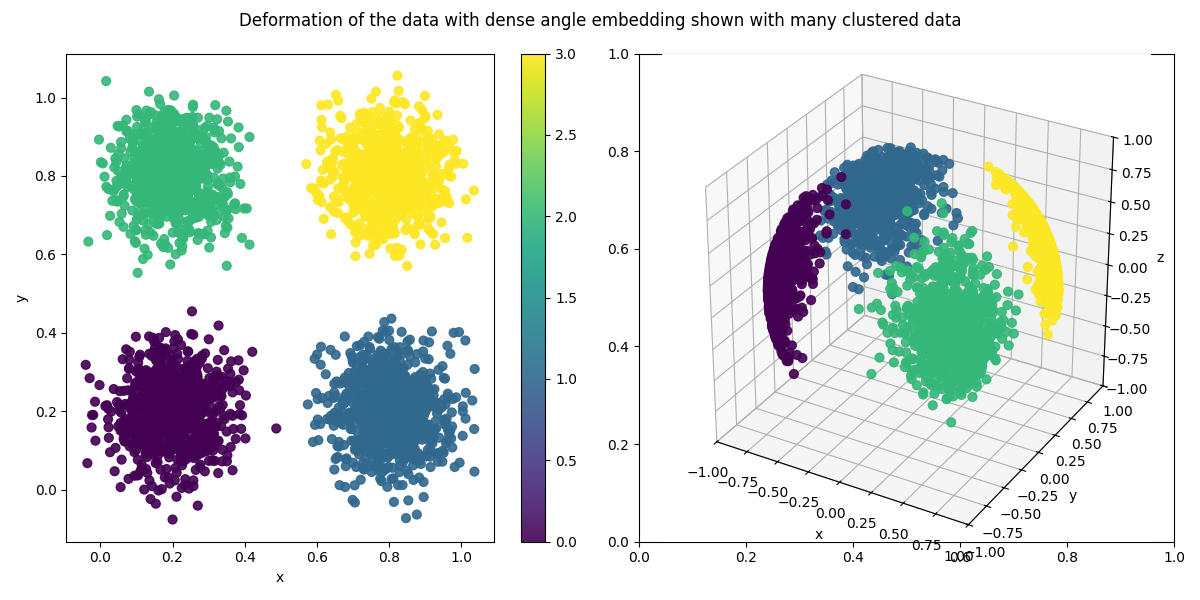

In [11]:
# best case scenario with many clusters
init_centers = [(0.2,0.2), (0.8,0.2), (0.2,0.8), (0.8,0.8)]
fig, ax, ax3d, values = display_deformation(deformation_functions=deformation_polar_functions,
                                            n_points=2500,
                                            title="Deformation of the data with dense angle embedding shown with many clustered data",
                                            seed=seed, 
                                            point_generation="clusters",
                                            init_centers=init_centers)


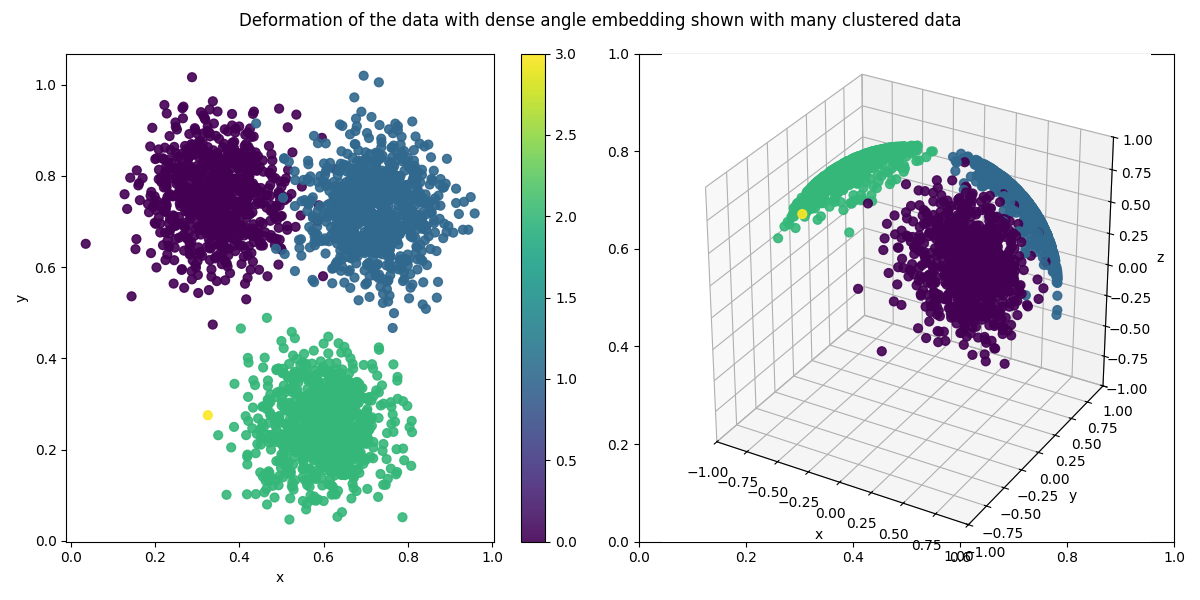

In [12]:
# Random case 


fig, ax, ax3d, values = display_deformation(deformation_functions=deformation_polar_functions,
                                            n_points=2500,
                                            title="Deformation of the data with dense angle embedding shown with many clustered data",
                                            seed=seed+4, 
                                            point_generation="clusters")


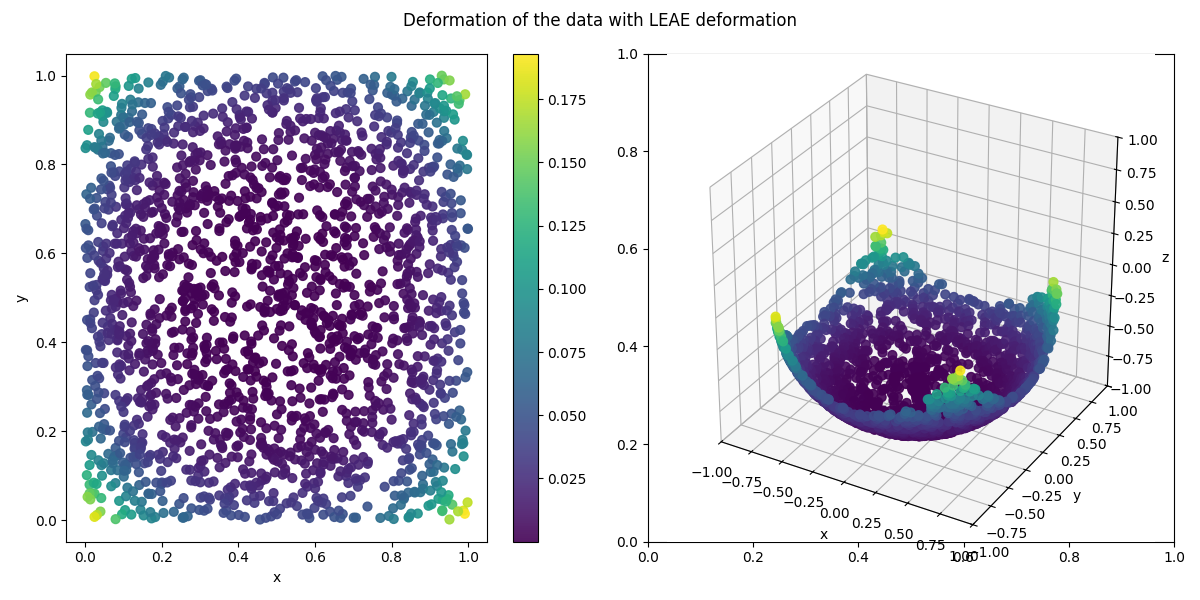

In [19]:


def center_data(pt):
    """A deformation function centering the data around (0,0)."""
    x,y = pt[0], pt[1]
    return (x-0.5, y-0.5)

def laea_deformation(pt):
    """A deformation function using polar coordinates."""
    x,y = pt[0], pt[1]
    r = np.linalg.norm(pt)
    theta = np.arccos(pt[1]/r)*np.sign(pt[0])
    return (2*np.arccos(r/2), theta)

def move_data(pt):
    """A deformation function centering the data around (0,0)."""
    x,y = pt[0], pt[1]
    x, y = (x-0.5, y-0.5)
    factor = 2
    return (x*factor, y*factor)

deformation_polar_functions = [move_data,laea_deformation]

# Display the deformation of the data with the polar deformation
fig, ax, ax3d, values = display_deformation(deformation_functions=deformation_polar_functions,
                                            range_y=(0,1),
                                            n_points=2000,
                                            title="Deformation of the data with LEAE deformation",
                                            seed=seed+4, 
                                            point_generation="random",
                                            init_centers=init_centers)



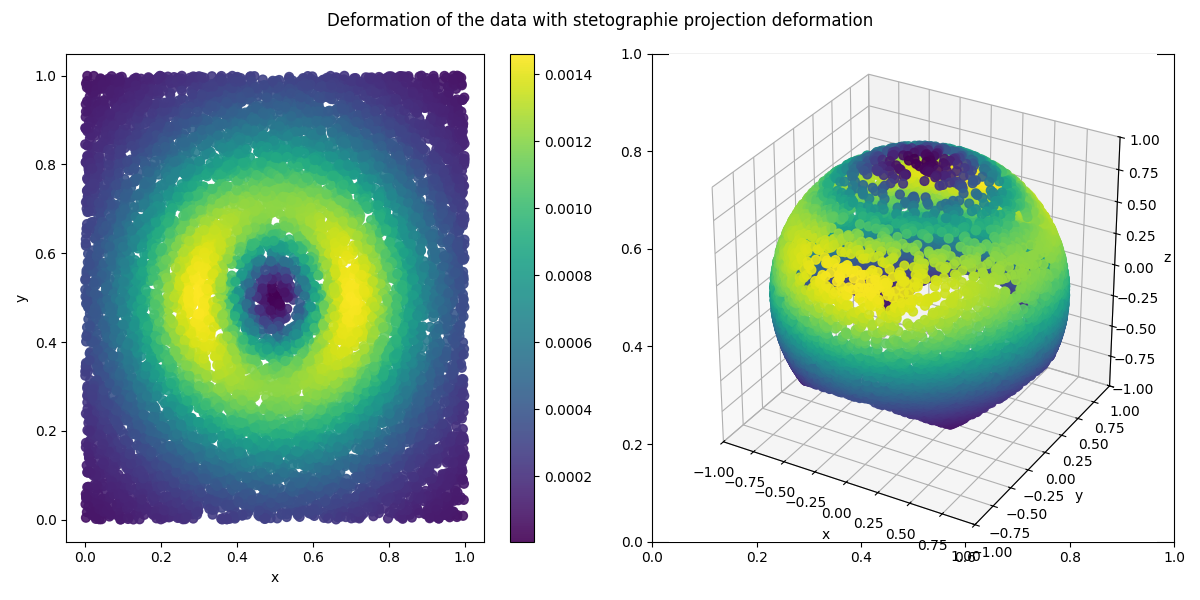

In [14]:

# stetographique projection

# best case scenario with many clusters
init_centers = [(0.2,0.2), (0.8,0.2), (0.2,0.8), (0.8,0.8)]


def center_data(pt):
    """A deformation function centering the data around (0,0)."""
    x,y = pt[0], pt[1]
    return (x-0.5, y-0.5)

def stetographique_deformation(pt):
    """A deformation function using polar coordinates."""
    
    x,y = pt[0], pt[1]

    r = np.linalg.norm(pt)
    theta = np.arccos(pt[1]/r)*np.sign(pt[0])
    r = 2*np.sqrt(2)*r
    
    return (2*(np.pi-np.arctan(r)),theta)


deformation_polar_functions = [center_data,stetographique_deformation]

# Display the deformation of the data with the polar deformation
fig, ax, ax3d, values = display_deformation(deformation_functions=deformation_polar_functions,
                                            range_y=(0,1),
                                            n_points=10000,
                                            title="Deformation of the data with stetographie projection deformation",
                                            seed=seed+4, 
                                            point_generation="random",
                                            init_centers=init_centers)

